# k-Nearest Neighbors

In [15]:
# imports, Python core
import random

# imports, Python packages
import matplotlib.pyplot as plt

# imports, same directory
from ch05_statistics import mean
from ch12_k_nearest_neighbors import knn_classify
from ch12_k_nearest_neighbors import random_distances

## The Model

Nearest neighbors is one of the simplest predictive models there is. It makes no mathematical assumptions, and it doesn’t require any sort of heavy machinery. The only
things it requires are:
* Some notion of distance
* An assumption that points that are close to one another are similar

We will use the concept of *distance* defined in Linear Algebra.

## Example: Favorite Languages

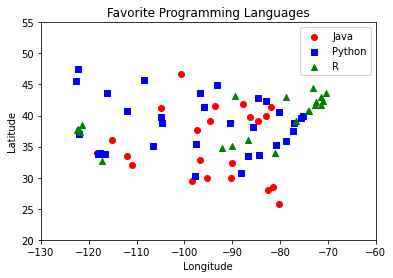

In [16]:
cities = [(-86.75,33.5666666666667,'Python'),
          (-88.25,30.6833333333333,'Python'),
          (-112.016666666667,33.4333333333333,'Java'),
          (-110.933333333333,32.1166666666667,'Java'),
          (-92.2333333333333,34.7333333333333,'R'),
          (-121.95,37.7,'R'),
          (-118.15,33.8166666666667,'Python'),
          (-118.233333333333,34.05,'Java'),
          (-122.316666666667,37.8166666666667,'R'),
          (-117.6,34.05,'Python'),
          (-116.533333333333,33.8166666666667,'Python'),
          (-121.5,38.5166666666667,'R'),
          (-117.166666666667,32.7333333333333,'R'),
          (-122.383333333333,37.6166666666667,'R'),
          (-121.933333333333,37.3666666666667,'R'),
          (-122.016666666667,36.9833333333333,'Python'),
          (-104.716666666667,38.8166666666667,'Python'),
          (-104.866666666667,39.75,'Python'),
          (-72.65,41.7333333333333,'R'),
          (-75.6,39.6666666666667,'Python'),
          (-77.0333333333333,38.85,'Python'),
          (-80.2666666666667,25.8,'Java'),
          (-81.3833333333333,28.55,'Java'),
          (-82.5333333333333,27.9666666666667,'Java'),
          (-84.4333333333333,33.65,'Python'),
          (-116.216666666667,43.5666666666667,'Python'),
          (-87.75,41.7833333333333,'Java'),
          (-86.2833333333333,39.7333333333333,'Java'),
          (-93.65,41.5333333333333,'Java'),
          (-97.4166666666667,37.65,'Java'),
          (-85.7333333333333,38.1833333333333,'Python'),
          (-90.25,29.9833333333333,'Java'),
          (-70.3166666666667,43.65,'R'),
          (-76.6666666666667,39.1833333333333,'R'),
          (-71.0333333333333,42.3666666666667,'R'),
          (-72.5333333333333,42.2,'R'),
          (-83.0166666666667,42.4166666666667,'Python'),
          (-84.6,42.7833333333333,'Python'),
          (-93.2166666666667,44.8833333333333,'Python'),
          (-90.0833333333333,32.3166666666667,'Java'),
          (-94.5833333333333,39.1166666666667,'Java'),
          (-90.3833333333333,38.75,'Python'),
          (-108.533333333333,45.8,'Python'),
          (-95.9,41.3,'Python'),
          (-115.166666666667,36.0833333333333,'Java'),
          (-71.4333333333333,42.9333333333333,'R'),
          (-74.1666666666667,40.7,'R'),
          (-106.616666666667,35.05,'Python'),
          (-78.7333333333333,42.9333333333333,'R'),
          (-73.9666666666667,40.7833333333333,'R'),
          (-80.9333333333333,35.2166666666667,'Python'),
          (-78.7833333333333,35.8666666666667,'Python'),
          (-100.75,46.7666666666667,'Java'),
          (-84.5166666666667,39.15,'Java'),
          (-81.85,41.4,'Java'),
          (-82.8833333333333,40,'Java'),
          (-97.6,35.4,'Python'),
          (-122.666666666667,45.5333333333333,'Python'),
          (-75.25,39.8833333333333,'Python'),
          (-80.2166666666667,40.5,'Python'),
          (-71.4333333333333,41.7333333333333,'R'),
          (-81.1166666666667,33.95,'R'),
          (-96.7333333333333,43.5666666666667,'Python'),
          (-90,35.05,'R'),
          (-86.6833333333333,36.1166666666667,'R'),
          (-97.7,30.3,'Python'),
          (-96.85,32.85,'Java'),
          (-95.35,29.9666666666667,'Java'),
          (-98.4666666666667,29.5333333333333,'Java'),
          (-111.966666666667,40.7666666666667,'Python'),
          (-73.15,44.4666666666667,'R'),
          (-77.3333333333333,37.5,'Python'),
          (-122.3,47.5333333333333,'Python'),
          (-89.3333333333333,43.1333333333333,'R'),
          (-104.816666666667,41.15,'Java')]

cities = [([longitude, latitude], language) for longitude, latitude, language in cities]


def plot_state_borders(plt, color='0.8'):
    pass


def plot_cities():
    """creates a scatter plot graph with languages per city"""

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language],
                          marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders(plt)    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Favorite Programming Languages")
    plt.show()






plot_cities()

In [17]:
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0
    for city in cities:
        location, actual_language = city
        other_cities = [other_city 
                        for other_city in cities
                        if other_city != city]

        predicted_language = knn_classify(k, other_cities, location)

        if predicted_language == actual_language:
            num_correct += 1

    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))

# It looks like 3-nearest neighbors performs the best, giving the correct result about
# 59% of the time:

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


Now we can look at what regions would get classified to which languages under each nearest neighbors scheme. We can do that by classifying an entire grid worth of points, and then plotting them as we did the cities.

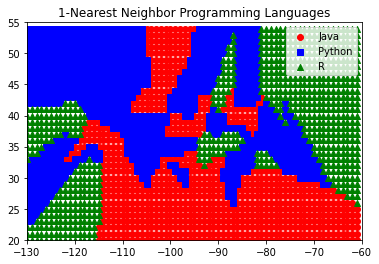

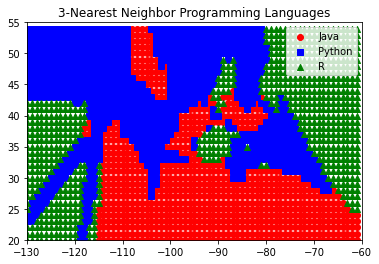

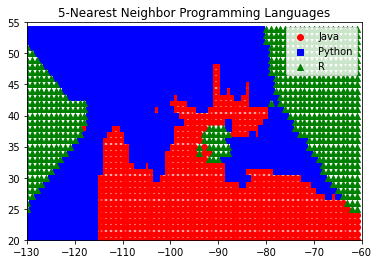

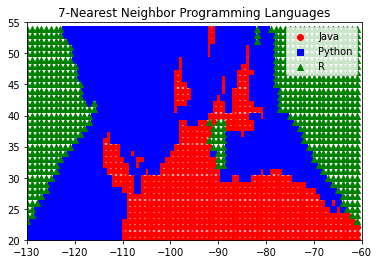

In [18]:
def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()


for k in [1, 3, 5, 7]:
    classify_and_plot_grid(k)

## The Curse of Dimensionality

k-nearest neighbors runs into trouble in higher dimensions thanks to the “curse of dimensionality”, which boils down to the fact that **high-dimensional spaces are vast**.

**Points in high-dimensional spaces tend not to be close to one another at all**. One way to see this is by randomly generating pairs of points in the d-dimensional “unit cube” in a variety of dimensions, and calculating the distances between them.

In [19]:
# define number of dimensions 
# and number of distances we will want in each dimension
dimensions = range(1, 101)
number_of_pairs = 10000

# initialize
distances_average = []
distances_min = []

# for each dimension, generate as many distances as number_of_pairs
for dimension in dimensions:
    distances = random_distances(dimension, number_of_pairs)
    distances_average.append(mean(distances))
    distances_min.append(min(distances))

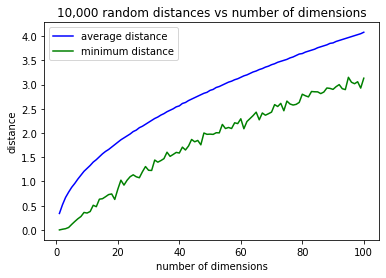

In [26]:

# x-axis values
xs = dimensions
# y-axis values
ys1 = distances_average
ys2 = distances_min

# make multiple calls to plt.plot to show multiple series on the same chart
plt.plot(xs, ys1, 'b-', label='average distance')    # blue solid line
plt.plot(xs, ys2, 'g-', label='minimum distance')    # green solid line

# labels, title and show
plt.legend(loc=2)       # loc=2 means "upper left"
plt.xlabel("number of dimensions")
plt.ylabel("distance")
plt.title("10,000 random distances vs number of dimensions")
plt.show()

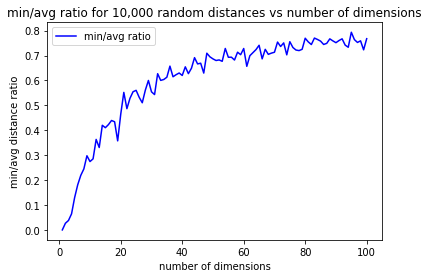

In [28]:
# x-axis values
xs = dimensions

# y-axis values
min_avg_ratio = [(min/avg) for min, avg in zip(distances_min, distances_average)]

# make multiple calls to plt.plo to show multiple series on the same chart
plt.plot(xs, min_avg_ratio, 'b-', label='min/avg ratio')    # blue solid line

# labels, title and show
plt.legend(loc=2)       # loc=2 means "upper left"
plt.xlabel("number of dimensions")
plt.ylabel("min/avg distance ratio")
plt.title("min/avg ratio for 10,000 random distances vs number of dimensions")
plt.show()

In low-dimensional data sets, the closest points tend to be much closer than average. But two points are close only if they’re close in every dimension, and every extra dimension—even if just noise—is another opportunity for each point to be further away from every other point. When you have a lot of dimensions, it’s likely that the closest points aren’t much closer than average, which means that two points being close doesn’t mean very much (unless there’s a lot of structure in your data that makes it behave as if it were much lower-dimensional).

A different way of thinking about the problem involves the sparsity of higher-dimensional spaces.

If you pick 50 random numbers between 0 and 1, you’ll probably get a pretty good sample of the unit interval

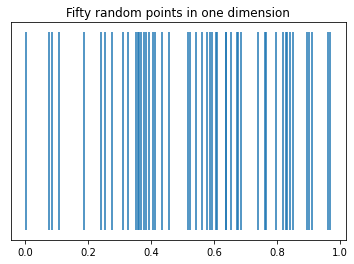

In [22]:
# x-axis and y-axis values
xs = [random.random() for _ in range(50)]

# Plot vertical lines at each x from ymin to ymax
# https://matplotlib.org/1.4.1/api/axes_api.html
plt.vlines(xs, 0, 1)

# labels, title and show
plt.title("Fifty random points in one dimension")
# hide-axis-values-but-keep-axis-tick-labels-in-matplotlib
# https://stackoverflow.com/questions/37039685/hide-axis-values-but-keep-axis-tick-labels-in-matplotlib
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()


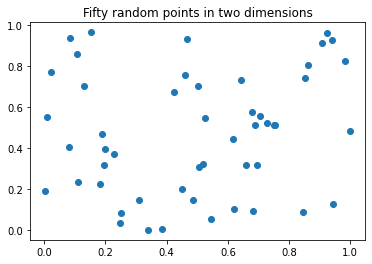

In [23]:
# x-axis and y-axis values
xs = [random.random() for _ in range(50)]
ys = [random.random() for _ in range(50)]

# generate scatter plot
plt.scatter(xs, ys)

# labels, title and show
plt.title("Fifty random points in two dimensions")
plt.show()

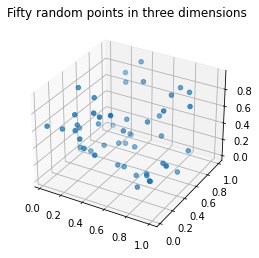

In [24]:

# https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# x, y, z axis values
xs = [random.random() for _ in range(50)]
ys = [random.random() for _ in range(50)]
zs = [random.random() for _ in range(50)]

# generate scatter plot
ax.scatter3D(xs, ys, zs)

# labels, title and show
plt.title("Fifty random points in three dimensions")
plt.show()
